# Nobel prizes

## 1. Loading the data
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

In [2]:
# Loading in required libraries: you will need pandas, seaborn and numpy
# ... YOUR CODE FOR TASK 1 ...
import numpy as np
import pandas as pd
import seaborn as sns

# Reading in the Nobel Prize data
nobel = pd.read_csv("datasets/nobel.csv")

# Explore the data - are there missing values? How many entries do we have?
#nobel.head()
nobel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [24]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016

prizes = nobel[['prize_share', 'sex']].shape[0]
print("Prizes: ", prizes)

# Display the number of prizes won by male and female recipients.

male = nobel[nobel['sex'] == "Male"].shape[0]
print("Male: ",male)

female = nobel[nobel['sex'] == "Female"].shape[0]
print("Female: ",female)

# Display the number of prizes won by the top 10 nationalities.

country_prize = nobel['birth_country'].value_counts()[0:10]
print("Top 10 Countries:\n",country_prize)


Prizes:  911
Male:  836
Female:  49
Top 10 Countries:
 United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Netherlands                  18
Canada                       18
Russia                       17
Italy                        17
Name: birth_country, dtype: int64


Which countries win most often?

## 3. USA dominance
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>
    

In [4]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year']/ 10) *10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index = False)['usa_born_winner'].mean()


# Display the proportions of USA born winners per decade
print(prop_usa_winners)


    decade  usa_born_winner
0     1900         0.017544
1     1910         0.075000
2     1920         0.074074
3     1930         0.250000
4     1940         0.302326
5     1950         0.291667
6     1960         0.265823
7     1970         0.317308
8     1980         0.319588
9     1990         0.403846
10    2000         0.422764
11    2010         0.292683


## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

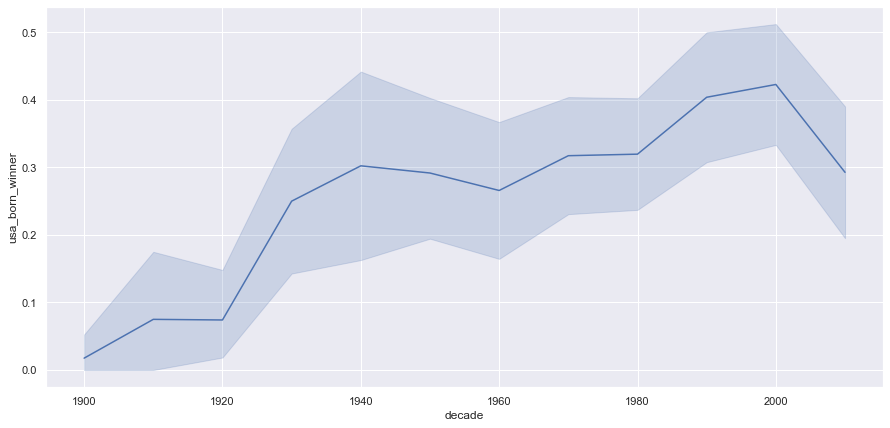

In [114]:
#using seaborn, plot the proportion of US winners by decade

ax = sns.lineplot(x = 'decade', y = 'usa_born_winner', data = nobel)

What can you conclude from the graph?
The USA  started dominating from the 1920s, just right after they hit a plateu of prize winners from 1910.

## 5. What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

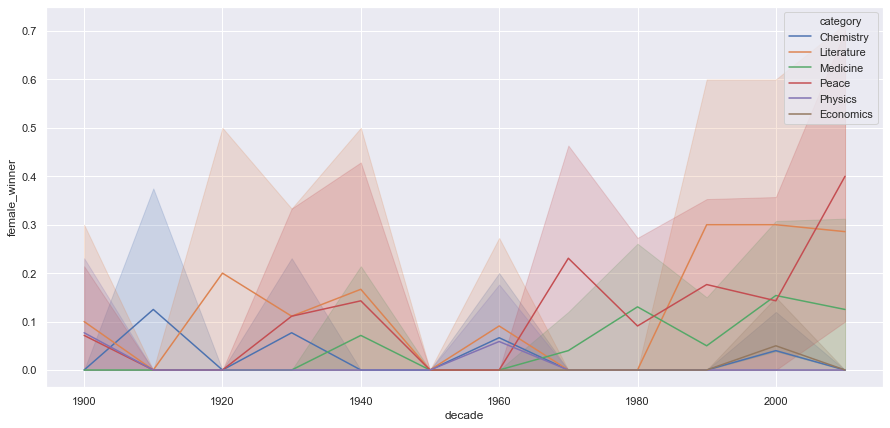

In [115]:
# Calculating the proportion of female laureates per decade

nobel['female_winner'] = nobel['sex'] == "Female"
prop_female_winners = nobel.groupby('decade', as_index = False)['female_winner'].mean()

# Plot proportion of female winners by decade, grouped by prize category (physics, medicine, etc)
sns.set(rc={'figure.figsize':(15, 7)})
ax = sns.lineplot(x = 'decade', y = 'female_winner', data = nobel, hue = 'category')




```
# This is formatted as code
```

 Interpret your plot here
 
All categories had no winners in 1910 except for Chemistry which had the highest number prize winners.

first world war ended in 1918, USA was involved. 

The Peace and Literature category intersect at 1930 having the same number of winners.
 
From 1930 categories fluctuate and Medicine finally had it's first female winners after 3 decades. 

In 1950 all categories had no female prize winners.
note: 1945 worldwar2 the war between China and the USA, woman were recruited to work in factories. The war only ended when USA dropped an atomic bomb in Hiroshima. In 1945 WW2 ended.
The Cold War from 1947 -1953

note :1946- 1960 Americans experienced economic expansion. 60% enjoyed standard of living. Civil rights movement was lead by Rosa Parks that was around the 1950s.

In 1960 there female winners from the Physics category after 5 decades of having none.
 
From 1960s to the 2000s, female Nobel Peace prize winners see a staggering growth after a decade of rest surpassing all categories. Medicine also had an increase in winners.
Martin Luther King "I have a dream" speach was in the 1960s
 
In 1980 Literature shows a massive positive relationship surpassing the Peace category

From the 2000s Nobel Peace prize winners increased having the highest number of winners.

# 6. The first woman to win the Nobel Prize
<p>The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p>
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>


In [153]:
# Picking out the first woman to win a Nobel Prize
first_year = min(nobel[nobel.sex =="Female"].year)
nobel[((nobel.year == first_year) & (nobel.sex =="Female"))]

#nobel.query('year <= 1910 & sex == "Female"').head(3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France


## 7. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

In [130]:
# Selecting the laureates that have received 2 or more prizes.

v = nobel.laureate_id.value_counts()
nobel[nobel.laureate_id.isin(v.index[v.gt(1)])]


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False





How many people have received 2 or more prizes?

## 8. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.</p>
<p>But how old are you generally when you get the prize?</p>

In [6]:
# Converting birth_date from String to datetime

nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

# Calculating the age of Nobel Prize winners

nobel['age'] = nobel['year']-nobel['birth_date'].dt.year

# What is the mean age of winners and it's standard devation? What is the median age?

mean = nobel['age'].mean()
standard_dev = nobel['age'].std()
median =  nobel['age'].median()

#nobel.age.describe()

## 9. Age differences between prize categories


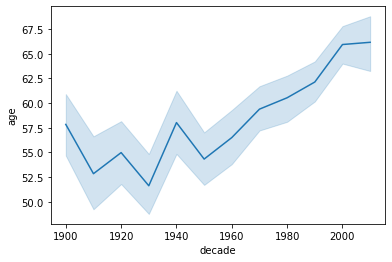

In [7]:
#Plot the age of nobel candidates by decade
ax = sns.lineplot(x = 'decade', y = 'age', data = nobel)

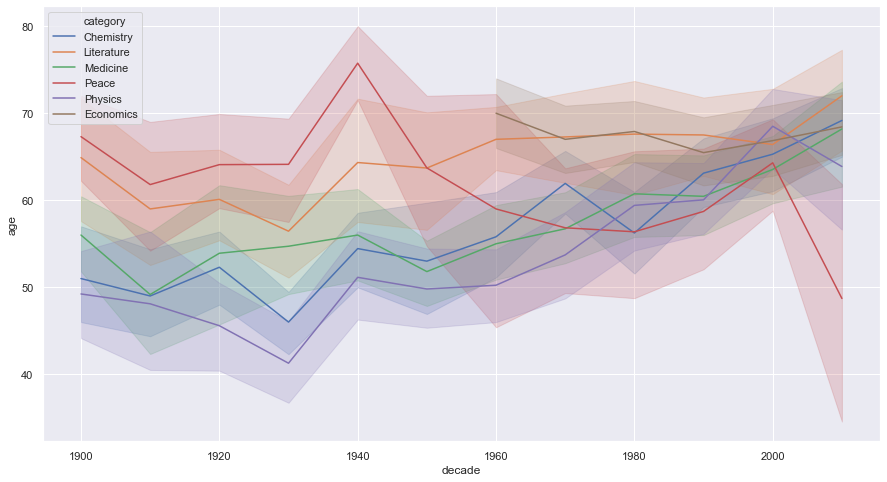

In [8]:



# Plot the age of nobel candidates by decade and prize category
sns.set(rc={'figure.figsize':(15, 8)})
bx = sns.lineplot(x = 'decade', y = 'age', data = nobel, hue = 'category')



What can you conclude about the age at which people win different types of Nobel Prizes?

You were more likely to obtain a Nobel Peace prize if you were older than 60 within the years 1900 - 1950.
From the 1950s Peace Prize winners started becoming younger with the youngest In the 2000s.

Most Physics prize winners are lot younger than the rest of the categories, we see an increase in age from the 1930s.

Chemistry prize winners are the second youngest for four decades since the 1900s.

If you were between ages 50 and 60 you were more likely to get a prize in Medicine

Economics prize winners are only seen from the 1960s where if you were around the late 60s of age you were more likely to obtain the prize. There are no winners from the Economics category below 60.

Note: The USA exported 28 Billion dollars worth of goods and services in the world market. Exports represent dollars flowing into the country in payments of goods and services.

Literature prize winners were older than 55 from 1900 to the 2000s

## 10. Oldest and youngest winners
<p>In the peace category there is a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

What can you conclude about the age at which people win different types of Nobel Prizes?


In [172]:
oldest = max(nobel.age)
youngest = min(nobel.age)

In [171]:
nobel[nobel.age == oldest]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,Male,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,90.0


In [173]:
nobel[nobel.age == youngest]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,17.0


## Congratulations! You've reached the end of the challenge!